![](https://cdn0.vox-cdn.com/thumbor/RZDeVsa_Vio_23NTmolK_uAm2mI=/0x1080/volume-assets.voxmedia.com/production/44fa1a513da4575430bd5519f0ec04b4/Thumb_5.jpg)

## Introduction 

- On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.
- Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people

# Defining the Question

What is Covid19?

COVID-19(Corona Virus, Discovered in 2019) is a respiratory illness caused by a new virus. Symptoms include fever, coughing, sore throat and shortness of breath. The virus can spread from person to person, but good hygiene can prevent infection.

## a) Specifying the Question

Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. Comparison of China where the COVID-19 originally originated from with the Rest of the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in coming days.

## b) Defining the Metric for Success


The metric for success in this project will be a well fitted and fairly accurate predictive regression and classification models that will optimumly Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days. 

## c) Understanding the context

- Below is a description of the features in the main dataset (covid_19_data.csv)

| Features      |       Description|
|---|---|
|Sno | Serial number |
|ObservationDate |  Date of the observation in MM/DD/YYYY |
|Province/State | Province or state of the observation (Could be empty when missing)|
|Country/Region | Country of observation|
|Last Update |Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)|
|Confirmed | Cumulative number of confirmed cases till that date |
|Deaths | Cumulative number of of deaths till that date |
|Recovered | Cumulative number of recovered cases till that date|


**From Related Information about COVID-19,**

COVID-19 may not be fatal but it spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.

Currently the goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. Flattening the Curve typically implies even if the number of Confirmed Cases are increasing but the distribution of those cases should be over longer timestamp. To put it in simple words if say suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month.

The sole reason to Flatten the Curve is to reudce the load on the Medical Systems so as to increase the focus of Research to find the Medicine for the disease.

Every Pandemic has four stages:

Stage 1: Confirmed Cases come from other countries

Stage 2: Local Transmission Begins

Stage 3: Communities impacted with local transimission

Stage 4: Significant Transmission with no end in sight

Italy and Korea are the two countries which are currently in Stage 4 While India is in Stage 2.

Other ways to tackle the disease like Corona other than Travel Ban, Cross-Border shutdown, Ban on immigrants are Testing, Contact Tracing and Quarantine.

## d) Recording the Experimental Design


* Problem Definition
* Data Sourcing
* Check the Data
* Perform Data Cleaning
* Perform Exploratory Data Analysis
* Modelling 
* Testing accuracy of the model

The main aim of the project is to create a predictive models  Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days. Data cleaning and exploratory data analysis will be done before creating the model and evaluation of the model and a final documentation of the project.



## e) Data Relevance


COVID19 is very relevant as its a current pandemic that has taken the world by the horns adn has really tested and shook the whole human race. Understanding its impact and creating predictive models is very necessary as  it shall help us come up with various insights and relevant measures where necessary

# Data Source Validation 
- The datasets are obtained from Kaggle and were provided by the John Hopkins University for educational and academic research purposes. 

[](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) 

[](https://systems.jhu.edu/research/public-health/ncov/) 



# Data Preparation

## 1. Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re #regular expressions
import plotly.express as px
# Plotting
import matplotlib.pylab as plt
import seaborn as sns

#Progress bar
from tqdm import tqdm
from datetime import datetime
import os
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


## 2. Importing and loading datasets

In [2]:
#upload the data
path = '../input/novel-corona-virus-2019-dataset/covid_19_data.csv'
path2 = '../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv'
path3 = '../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv'
path4 = '../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv'
path5 = '../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv'
path6 = '../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv'
path7 = '../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv'
path8 = '../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv'

In [3]:
#loading datasets
covid_df = pd.read_csv(path)
covid_data = pd.read_csv(path2)
global_data = pd.read_csv(path3)
us_confirmed = pd.read_csv(path4)
confirmed = pd.read_csv(path5)
us_deaths = pd.read_csv(path6)
deaths = pd.read_csv(path7)
recovered = pd.read_csv(path8)

In [4]:
#loading the latest covid_19 dataset
display(covid_df)

SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
18960  18961      04/26/2020        Wyoming              US   
18961  18962      04/26/2020       Xinjiang  Mainland China   
18962  18963      04/26/2020          Yukon          Canada   
18963  18964      04/26/2020         Yunnan  Mainland China   
18964  18965      04/26/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        6.0     0.0        0.0  
3          1/22/2020 17:00        1.0     0.0        0.0  
4          1/22/2020 17:00        0.0     0.0        0.0  
...                    ...        ...     ...        ...  
18960  2020-04-27 02:31:20      502.0     7.0        0.0  
18961  2020-04-27 02:31:20       76.0     3.0       73.0  
18962  2020-04-27 02:31:20       11.0     0.0        0.0  
18963  2020-04-27 02:31:20      185.0     2.0      181.0  
18964  2020-04-27 02:31:20     1268.0     1.0     1258.0  

[18965 rows x 8 columns]

### Checking dimmensions and datatypes

In [5]:
#checking the shape of the dataset
covid_df.shape

(18965, 8)

In [6]:
#checking the datatypes
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18965 entries, 0 to 18964
Data columns (total 8 columns):
SNo                18965 non-null int64
ObservationDate    18965 non-null object
Province/State     9326 non-null object
Country/Region     18965 non-null object
Last Update        18965 non-null object
Confirmed          18965 non-null float64
Deaths             18965 non-null float64
Recovered          18965 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


Observations:
* There are 4 object datatypes, 3 float datatypes and 1 integer datatype. Half the columns are numerical and the other half is categorical.

### Statistical summary

In [7]:
#Statistical description of dataset
covid_df.describe().transpose()

count         mean           std  min     25%     50%      75%  \
SNo        18965.0  9483.000000   5474.868263  1.0  4742.0  9483.0  14224.0   
Confirmed  18965.0  3237.481571  15904.297951  0.0    10.0   107.0    712.0   
Deaths     18965.0   196.188347   1447.754795  0.0     0.0     1.0      9.0   
Recovered  18965.0   827.524703   5995.640387  0.0     0.0     2.0     75.0   

                max  
SNo         18965.0  
Confirmed  288045.0  
Deaths      26644.0  
Recovered  117727.0

### Coverting to datetime datatype

In [8]:
#Split the date column into month and year then add those two columns

covid_df.ObservationDate = covid_df.ObservationDate.apply(lambda x: x.replace('/', '-'))
covid_df['observation_date']= pd.to_datetime(covid_df['ObservationDate']) 

#coverting last update into datetime

covid_df['last_update'] = covid_df['Last Update'].apply(lambda x: x.replace('/', '-'))
covid_df['last_update']= pd.to_datetime(covid_df['Last Update']) 

covid_df.head()


SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01-22-2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01-22-2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01-22-2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01-22-2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01-22-2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered observation_date         last_update  
0        1.0     0.0        0.0       2020-01-22 2020-01-22 17:00:00  
1       14.0     0.0        0.0       2020-01-22 2020-01-22 17:00:00  
2        6.0     0.0        0.0       2020-01-22 2020-01-22 17:00:00  
3        1.0     0.0        0.0       2020-01-22 2020-01-22 17:00:00  
4        0.0     0.0        0.0       2020-01-22 2020-01-22 17:00:00

In [9]:
#confirming change in datatypes
covid_df.dtypes

SNo                          int64
ObservationDate             object
Province/State              object
Country/Region              object
Last Update                 object
Confirmed                  float64
Deaths                     float64
Recovered                  float64
observation_date    datetime64[ns]
last_update         datetime64[ns]
dtype: object

In [10]:
#confirming the change in datatypes and split
covid_df.dtypes

SNo                          int64
ObservationDate             object
Province/State              object
Country/Region              object
Last Update                 object
Confirmed                  float64
Deaths                     float64
Recovered                  float64
observation_date    datetime64[ns]
last_update         datetime64[ns]
dtype: object

### Unique values

In [11]:
cols=covid_df.columns.to_list()

for column in cols:
   print("\n")
   print("Column Name:", column)
   print(covid_df[column].unique())



Column Name: SNo
[    1     2     3 ... 18963 18964 18965]


Column Name: ObservationDate
['01-22-2020' '01-23-2020' '01-24-2020' '01-25-2020' '01-26-2020'
 '01-27-2020' '01-28-2020' '01-29-2020' '01-30-2020' '01-31-2020'
 '02-01-2020' '02-02-2020' '02-03-2020' '02-04-2020' '02-05-2020'
 '02-06-2020' '02-07-2020' '02-08-2020' '02-09-2020' '02-10-2020'
 '02-11-2020' '02-12-2020' '02-13-2020' '02-14-2020' '02-15-2020'
 '02-16-2020' '02-17-2020' '02-18-2020' '02-19-2020' '02-20-2020'
 '02-21-2020' '02-22-2020' '02-23-2020' '02-24-2020' '02-25-2020'
 '02-26-2020' '02-27-2020' '02-28-2020' '02-29-2020' '03-01-2020'
 '03-02-2020' '03-03-2020' '03-04-2020' '03-05-2020' '03-06-2020'
 '03-07-2020' '03-08-2020' '03-09-2020' '03-10-2020' '03-11-2020'
 '03-12-2020' '03-13-2020' '03-14-2020' '03-15-2020' '03-16-2020'
 '03-17-2020' '03-18-2020' '03-19-2020' '03-20-2020' '03-21-2020'
 '03-22-2020' '03-23-2020' '03-24-2020' '03-25-2020' '03-26-2020'
 '03-27-2020' '03-28-2020' '03-29-2020' '03-30-202

['1/22/2020 17:00' '1/23/20 17:00' '1/24/20 17:00' ...
 '2020-04-25 06:31:19' '2020-04-26 02:31:18' '2020-04-27 02:31:20']


Column Name: Confirmed
[1.0000e+00 1.4000e+01 6.0000e+00 ... 1.2970e+04 1.3521e+04 5.9120e+03]


Column Name: Deaths
[0.000e+00 1.700e+01 1.000e+00 ... 1.516e+03 6.510e+02 7.490e+02]


Column Name: Recovered
[0.00000e+00 2.80000e+01 2.00000e+00 ... 1.06988e+05 1.26500e+03
 1.25800e+03]


Column Name: observation_date
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '20

In [12]:
covid_df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'observation_date',
       'last_update'],
      dtype='object')

### Dealing with missing values

In [13]:
covid_df.isna().sum()

SNo                    0
ObservationDate        0
Province/State      9639
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
observation_date       0
last_update            0
dtype: int64

In [14]:
covid_df=covid_df.drop(['Province/State','Last Update', 'ObservationDate'], 1, inplace= False)

In [15]:
#confirming no missing values
covid_df.isna().sum()

SNo                 0
Country/Region      0
Confirmed           0
Deaths              0
Recovered           0
observation_date    0
last_update         0
dtype: int64

In [16]:
#lower case
covid_df.columns = map(str.lower, covid_df.columns)
covid_df.columns

Index(['sno', 'country/region', 'confirmed', 'deaths', 'recovered',
       'observation_date', 'last_update'],
      dtype='object')

#### Duplicate values

In [17]:
covid_df.duplicated().any()

False

There are no duplicated values.

## global_data

In [18]:
global_data.head()

ID age     sex                        city province country  \
0  1.0  30    male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47    male  Baohe District, Hefei City    Anhui   China   
2  3.0  49    male  High-Tech Zone, Hefei City    Anhui   China   
3  4.0  47  female  High-Tech Zone, Hefei City    Anhui   China   
4  5.0  50  female  Feidong County, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)   latitude   longitude geo_resolution  ...  \
0                    1.0  31.646960  117.716600         admin3  ...   
1                    1.0  31.778630  117.331900         admin3  ...   
2                    1.0  31.828313  117.224844          point  ...   
3                    1.0  31.828313  117.224844          point  ...   
4                    1.0  32.001230  117.568100         admin3  ...   

  Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 41 Unnamed: 42 Unnamed: 43  Unnamed: 44  
0         NaN         NaN         NaN          NaN  
1         NaN         NaN         NaN          NaN  
2         NaN         NaN         NaN          NaN  
3         NaN         NaN         NaN          NaN  
4         NaN         NaN         NaN          NaN  

[5 rows x 45 columns]

In [19]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
wuhan(0)_not_wuhan(1)       13170 non-null float64
latitude                    13147 non-null float64
longitude                   13147 non-null float64
geo_resolution              13147 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
lives_in_Wuhan              565 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
addi

In [20]:
global_data.shape

(14126, 45)

In [21]:
# checking unique values

cols=global_data.columns.to_list()

for column in cols:
   print("\n")
   print("Column Name:", column)
   print(global_data[column].unique())



Column Name: ID
[1.0000e+00 2.0000e+00 3.0000e+00 ... 1.3477e+04 1.3478e+04 1.3479e+04]


Column Name: age
['30' '47' '49' '50' nan '42' '59' '39' '38' '45' '33' '37' '32' '18' '56'
 '44' '65' '21' '41' '70' '43' '31' '24' '40' '66' '36' '10' '63' '78'
 '76' '48' '62' '46' '34' '72' '20' '54' '2' '29' '61' '51' '80' '69' '28'
 '55' '68' '57' '35' '27' '52' '22' '23' '88' '19' '60' '58' '53' '25'
 '36-45' '26' '64' '30-39' '11' '50-59' '73' '74' '7' '82' '67' '15' '16'
 '60-69' '40-49' '80-89' '27-40' '5' '3' '4' '71' '20-29' '77' '75'
 '16-80' '94' '38-68' '23-72' '81' '0.58333' '17' 'Belgium' '8' '9'
 '0.08333' '12' '0.5' '83' '84' '60-60' '1' '79' '87' '22-80' '19-77'
 '8-68' '21-72' '40-89' '0.25' '13-19' '70-79' '80-80' '0-6' '0-10'
 '10-19' '96' '1.75' '18-65' '0-18']


Column Name: sex
['male' 'female' nan '4000' 'Female' 'Male']


Column Name: city
['Chaohu City, Hefei City' 'Baohe District, Hefei City'
 'High-Tech Zone, Hefei City' 'Feidong County, Hefei City' "Lu'an City"
 '

### Handling non-NaN values

In [22]:
#replacing non-NAN values with nan in the sex column
global_data=global_data.replace(['4000'],np.nan)
global_data['sex']=global_data['sex'].str.lower()
global_data.sex.unique()

array(['male', 'female', nan], dtype=object)

In [23]:
#replacing non-NAN values with nan in the age column
global_data=global_data.replace(['0.58333', 'Belgium', '0.08333'],np.nan)
global_data.age.unique()

array(['30', '47', '49', '50', nan, '42', '59', '39', '38', '45', '33',
       '37', '32', '18', '56', '44', '65', '21', '41', '70', '43', '31',
       '24', '40', '66', '36', '10', '63', '78', '76', '48', '62', '46',
       '34', '72', '20', '54', '2', '29', '61', '51', '80', '69', '28',
       '55', '68', '57', '35', '27', '52', '22', '23', '88', '19', '60',
       '58', '53', '25', '36-45', '26', '64', '30-39', '11', '50-59',
       '73', '74', '7', '82', '67', '15', '16', '60-69', '40-49', '80-89',
       '27-40', '5', '3', '4', '71', '20-29', '77', '75', '16-80', '94',
       '38-68', '23-72', '81', '17', '8', '9', '12', '0.5', '83', '84',
       '60-60', '1', '79', '87', '22-80', '19-77', '8-68', '21-72',
       '40-89', '0.25', '13-19', '70-79', '80-80', '0-6', '0-10', '10-19',
       '96', '1.75', '18-65', '0-18'], dtype=object)

### Dropping columns

In [24]:
#dropping irrelevant columns
columns = ['Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37','Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44']

global_data = global_data.drop(columns,  axis=1, inplace = False)

global_data.head()

ID age     sex                        city province country  \
0  1.0  30    male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47    male  Baohe District, Hefei City    Anhui   China   
2  3.0  49    male  High-Tech Zone, Hefei City    Anhui   China   
3  4.0  47  female  High-Tech Zone, Hefei City    Anhui   China   
4  5.0  50  female  Feidong County, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)   latitude   longitude geo_resolution  ... outcome  \
0                    1.0  31.646960  117.716600         admin3  ...     NaN   
1                    1.0  31.778630  117.331900         admin3  ...     NaN   
2                    1.0  31.828313  117.224844          point  ...     NaN   
3                    1.0  31.828313  117.224844          point  ...     NaN   
4                    1.0  32.001230  117.568100         admin3  ...     NaN   

  date_death_or_discharge notes_for_discussion        location  \
0                     NaN                  NaN             NaN   
1                     NaN                  NaN             NaN   
2                     NaN                  NaN  High-Tech Zone   
3                     NaN                  NaN  High-Tech Zone   
4                     NaN                  NaN             NaN   

             admin3      admin2 admin1 country_new admin_id  \
0       Chaohu City  Hefei City  Anhui       China   340181   
1    Baohe District  Hefei City  Anhui       China   340111   
2  Shushan District  Hefei City  Anhui       China   340104   
3  Shushan District  Hefei City  Anhui       China   340104   
4    Feidong County  Hefei City  Anhui       China   340122   

   data_moderator_initials  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

[5 rows x 33 columns]

### Missing values and duplicates

In [25]:
#checking the percentage of missing values
global_data.isna().mean().round(4) * 100

ID                           6.75
age                         90.47
sex                         91.06
city                        27.84
province                     8.64
country                      6.93
wuhan(0)_not_wuhan(1)        6.77
latitude                     6.93
longitude                    6.93
geo_resolution               6.93
date_onset_symptoms         94.72
date_admission_hospital     94.83
date_confirmation            7.34
symptoms                    96.51
lives_in_Wuhan              96.00
travel_history_dates        96.44
travel_history_location     94.63
reported_market_exposure    99.75
additional_information      82.93
chronic_disease_binary      99.87
chronic_disease             99.91
source                       8.33
sequence_available          99.99
outcome                     98.70
date_death_or_discharge     99.34
notes_for_discussion        98.68
location                    92.75
admin3                      91.80
admin2                      35.81
admin1        

In [26]:
#for age fill nans with unknown(0)
global_data["age"].fillna("unknown", inplace=True)
#when gender is not know fill with unknown
global_data["sex"].fillna("unknown", inplace=True)
#replace unknown values of cities with unknown
global_data["city"].fillna("unknown", inplace=True)
#replace unknown values of province and countries with unknown 
global_data["province"].fillna("unknown", inplace=True)
global_data["date_onset_symptoms"].fillna("unknown", inplace=True)
global_data["date_admission_hospital"].fillna("unknown", inplace=True)
global_data["country"].fillna("unknown", inplace=True)
#we have people we do not know if they come from wuhan or now.We shall replace with 2
#wuhan(0)_not_wuhan(1)
global_data["wuhan(0)_not_wuhan(1)"].fillna("2", inplace=True)

In [27]:
# confirming the imputing
global_data.isna().mean().round(4) * 100

ID                           6.75
age                          0.00
sex                          0.00
city                         0.00
province                     0.00
country                      0.00
wuhan(0)_not_wuhan(1)        0.00
latitude                     6.93
longitude                    6.93
geo_resolution               6.93
date_onset_symptoms          0.00
date_admission_hospital      0.00
date_confirmation            7.34
symptoms                    96.51
lives_in_Wuhan              96.00
travel_history_dates        96.44
travel_history_location     94.63
reported_market_exposure    99.75
additional_information      82.93
chronic_disease_binary      99.87
chronic_disease             99.91
source                       8.33
sequence_available          99.99
outcome                     98.70
date_death_or_discharge     99.34
notes_for_discussion        98.68
location                    92.75
admin3                      91.80
admin2                      35.81
admin1        

In [28]:
columns = ['travel_history_dates','travel_history_location', 'notes_for_discussion','longitude', 'latitude', 'province','city', 'admin1', 'admin2','admin_id', 'geo_resolution', 'admin3', 'outcome', 'reported_market_exposure', 'travel_history_location','chronic_disease', 'sequence_available', 'additional_information', 'data_moderator_initials', 'lives_in_Wuhan', 'symptoms', 'date_death_or_discharge', 'location', 'chronic_disease_binary']

global_data = global_data.drop(columns,  axis=1, inplace = False)

global_data.isna().sum()

ID                          953
age                           0
sex                           0
country                       0
wuhan(0)_not_wuhan(1)         0
date_onset_symptoms           0
date_admission_hospital       0
date_confirmation          1037
source                     1176
country_new                1047
dtype: int64

In [29]:
#dropping rows with missing values
global_data=global_data.dropna()
global_data.isnull().sum()

ID                         0
age                        0
sex                        0
country                    0
wuhan(0)_not_wuhan(1)      0
date_onset_symptoms        0
date_admission_hospital    0
date_confirmation          0
source                     0
country_new                0
dtype: int64

In [30]:
#checking for duplicates
global_data.duplicated().sum()

0

There are no duplicates.

In [31]:
#checking the new shape
global_data.shape

(12806, 10)

Now there are 12,806 rows and 10 columns

## Confirmed cases

In [32]:
##displaying dataset of global confirmed cases
confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/17/20  4/18/20  4/19/20  4/20/20  \
0        0        0        0  ...      906      933      996     1026   
1        0        0        0  ...      539      548      562      584   
2        0        0        0  ...     2418     2534     2629     2718   
3        0        0        0  ...      696      704      713      717   
4        0        0        0  ...       19       24       24       24   

   4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  
0     1092     1176     1279     1351     1463     1531  
1      609      634      663      678      712      726  
2     2811     2910     3007     3127     3256     3382  
3      717      723      723      731      738      738  
4       24       25       25       25       25       26  

[5 rows x 100 columns]

In [33]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 100 columns):
Province/State    82 non-null object
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2

In [34]:
confirmed.shape

(264, 100)

### Missing values and duplicates

In [35]:
confirmed.isna().sum()

Province/State    182
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/22/20             0
4/23/20             0
4/24/20             0
4/25/20             0
4/26/20             0
Length: 100, dtype: int64

We drop the province/state column since its not significant in our study since we already have the countries.

In [36]:
confirmed=confirmed.drop(['Province/State', 'Long', 'Lat'], 1, inplace= False)

In [37]:
#confirming there are no null values
print(confirmed.isnull().sum())

Country/Region    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
4/22/20           0
4/23/20           0
4/24/20           0
4/25/20           0
4/26/20           0
Length: 97, dtype: int64


### Coverting object to datetime datatype

In [38]:

 
# confirmed.columns=confirmed.columns.str.strip().str.replace('20','2020')
# confirmed.columns=confirmed.columns.str.strip().str.replace('/','-')

In [39]:
confirmed.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20',
       '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20',
       '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20'

### Unique values

In [40]:
cols=confirmed.columns.to_list()

for column in cols:
   print("\n")
   print("Column Name:", column)
   print(confirmed[column].unique())



Column Name: Country/Region
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South' 'Kuwait'
 'Kyr

Column Name: 4/5/20
[   349    361   1320    501     14     15   1451    822     96   2580
     27    907    407     82   1135    453  12051    584     28    700
     88     56    562  19691     22      5    157    654  11130    135
    531    345      7    114    650   1181   1203     13    203     98
    217    262   4354   7944    249      8      9   4471    990    586
    579    350    138   1524    254    146    168    327    504   1276
    890  67803   1019    117    651    937    142     44     75     18
    256    779    558    180      1     76    184   1263   1485     45
    154    454    261   1182    712    320    446   4587    181     11
   4369     59   1745   3646   1173     62     16     29   1097     43
     12   1927     61     41    147    344      6     32    149  70478
     21      4    174 100123    214   1735    121     24    268    733
   1486   3588   2273  58226    961   4994   8430 128948     58   3139
  10237    556    533    527     77    811   2804     72 

## Recovered

In [41]:
recovered.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/17/20  4/18/20  4/19/20  4/20/20  \
0        0        0        0  ...       99      112      131      135   
1        0        0        0  ...      283      302      314      327   
2        0        0        0  ...      846      894     1047     1099   
3        0        0        0  ...      191      205      235      248   
4        0        0        0  ...        5        6        6        6   

   4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  
0      150      166      179      188      188      207  
1      345      356      385      394      403      410  
2     1152     1204     1355     1408     1479     1508  
3      282      309      333      344      344      344  
4        6        6        6        6        6        6  

[5 rows x 100 columns]

In [42]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 100 columns):
Province/State    67 non-null object
Country/Region    250 non-null object
Lat               250 non-null float64
Long              250 non-null float64
1/22/20           250 non-null int64
1/23/20           250 non-null int64
1/24/20           250 non-null int64
1/25/20           250 non-null int64
1/26/20           250 non-null int64
1/27/20           250 non-null int64
1/28/20           250 non-null int64
1/29/20           250 non-null int64
1/30/20           250 non-null int64
1/31/20           250 non-null int64
2/1/20            250 non-null int64
2/2/20            250 non-null int64
2/3/20            250 non-null int64
2/4/20            250 non-null int64
2/5/20            250 non-null int64
2/6/20            250 non-null int64
2/7/20            250 non-null int64
2/8/20            250 non-null int64
2/9/20            250 non-null int64
2/10/20           250 non-null int64
2

In [43]:
recovered.shape

(250, 100)

### unique values

In [44]:
cols=recovered.columns.to_list()
for column in cols:
   print("\n")
   print("Column Name:", column)
   print(recovered[column].unique())



Column Name: Province/State
[nan 'Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia'
 'Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei'
 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau'
 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan'
 'Tianjin' 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang' 'Faroe Islands'
 'Greenland' 'French Guiana' 'French Polynesia' 'Guadeloupe' 'Martinique'
 'Mayotte' 'New Caledonia' 'Reunion' 'Saint Barthelemy' 'St Martin'
 'Aruba' 'Curacao' 'Sint Maarten' 'Bermuda' 'Cayman Islands'
 'Channel Islands' 'Gibraltar' 'Isle of Man' 'Montserrat' 'Anguilla'
 'British Virgin Islands' 'Turks and Caicos Islands'
 'Bonaire, Sint Eustatius and Saba' 'Falkland Islands (Malvinas)'
 'Saint Pierre and Miquelon']


Column Name: Country/Region
['Afghanistan' 'Al

### Missing values and duplicates

In [45]:
recovered.isna().sum()

Province/State    183
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/22/20             0
4/23/20             0
4/24/20             0
4/25/20             0
4/26/20             0
Length: 100, dtype: int64

In [46]:
recovered=recovered.drop(['Province/State', 'Long', 'Lat'], 1 , inplace=False)
recovered.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20',
       '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20',
       '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20'

In [47]:
#columns to lower case

## Deaths

In [48]:
deaths.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/17/20  4/18/20  4/19/20  4/20/20  \
0        0        0        0  ...       30       30       33       36   
1        0        0        0  ...       26       26       26       26   
2        0        0        0  ...      364      367      375      384   
3        0        0        0  ...       35       35       36       37   
4        0        0        0  ...        2        2        2        2   

   4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  
0       36       40       42       43       47       50  
1       26       27       27       27       27       28  
2      392      402      407      415      419      425  
3       37       37       37       40       40       40  
4        2        2        2        2        2        2  

[5 rows x 100 columns]

In [49]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 100 columns):
Province/State    82 non-null object
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2

In [50]:
deaths.shape

(264, 100)

### Unique values

In [51]:
cols=deaths.columns.to_list()
for column in cols:
    print("\n")
    print("Column Name:", column)
    print(deaths[column].unique())



Column Name: Province/State
[nan 'Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia'
 'Alberta' 'British Columbia' 'Grand Princess' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Nova Scotia' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Saskatchewan' 'Anhui' 'Beijing'
 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi' 'Guizhou' 'Hainan'
 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei' 'Hunan'
 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau' 'Ningxia'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang' 'Faroe Islands' 'Greenland'
 'French Guiana' 'French Polynesia' 'Guadeloupe' 'Mayotte' 'New Caledonia'
 'Reunion' 'Saint Barthelemy' 'St Martin' 'Martinique' 'Aruba' 'Curacao'
 'Sint Maarten' 'Bermuda' 'Cayman Islands' 'Channel Islands' 'Gibraltar'
 'Isle of Man' 'Montserrat' 'Diamond Princess' 'Recovered'
 '

### Missing values and duplicates

In [52]:
deaths.isna().sum()

Province/State    182
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/22/20             0
4/23/20             0
4/24/20             0
4/25/20             0
4/26/20             0
Length: 100, dtype: int64

In [53]:
deaths=deaths.drop(['Province/State', 'Long', 'Lat'], 1, inplace=False)

In [54]:
# Cofirming there are no missing values
deaths.isna().sum()

Country/Region    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
4/22/20           0
4/23/20           0
4/24/20           0
4/25/20           0
4/26/20           0
Length: 97, dtype: int64

# Exploratory Data Analysis

### Visualizations

In [55]:
#Importing Necessary Libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import seaborn as sns
import plotly
import plotly.express as px

In [56]:
#Setting up plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, plot_mpl
import plotly.offline as py
init_notebook_mode(connected=True)

In [57]:
latest=pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv")

In [58]:
fig = px.bar(latest, x='ObservationDate', y='Confirmed', hover_data=['Province/State','Confirmed','Deaths', 'Recovered'], color='Country/Region')
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Barplot : Confirmed Cases per Country',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

In [59]:
fig = px.line(latest.loc[latest['Country/Region'] == 'Mainland China'], x='ObservationDate', y='Confirmed', hover_data=['Province/State', 'Deaths', 'Recovered','Confirmed'], color='Province/State')
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Line graph : Confirmed cases in Mainland China',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

- Wuhan is the capital city of Hubei province in the People's Republic of China

In [60]:
fig = px.line(pd.DataFrame(latest.groupby('ObservationDate')['Deaths'].sum().reset_index()), x="ObservationDate", y="Deaths")
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='World Cumulative Death Toll',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

In [61]:
pxdf = px.data.gapminder()
country_isoAlpha = pxdf[['country', 'iso_alpha']].drop_duplicates()
country_isoAlpha.rename(columns = {'country':'Country'}, inplace=True)
country_isoAlpha.set_index('Country', inplace=True)
country_map = country_isoAlpha.to_dict('index')

In [62]:
def getCountryIsoAlpha(country):
    try:
        return country_map[country]['iso_alpha']
    except:
        return country

In [63]:
latest.replace({'Country/Region': 'Mainland China'}, 'China', inplace=True)
latest['iso_alpha'] = latest['Country/Region'].apply(getCountryIsoAlpha)

In [64]:
latestplot = latest.groupby('iso_alpha').max().reset_index()
fig = px.choropleth(latestplot, locations="iso_alpha",
                    color="Confirmed",
                    hover_data=["Confirmed", "Deaths", "Recovered"],
                    color_continuous_scale="Viridis")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(title='Map Visualization : Deaths Cases in World',margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [65]:
fig = px.scatter_geo(latest, locations="iso_alpha", 
                     color="Confirmed", size='Confirmed', hover_name="Country/Region", 
                    hover_data=["Confirmed", "Deaths", "Recovered"],
                     projection="natural earth", animation_frame="ObservationDate",title='Map Visualization : Confirmed Cases in the World per date ')
fig.show()

In [66]:
latestplot = latest.groupby('iso_alpha').max().reset_index()
fig = px.choropleth(latestplot, locations="iso_alpha",
                    color="Deaths",
                    hover_data=["Confirmed", "Deaths", "Recovered"],
                    color_continuous_scale="Viridis")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(title='Map Visualization : Deaths Cases in World',margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [67]:
fig = px.scatter_geo(latest, locations="iso_alpha", 
                     color="Deaths", size='Deaths', hover_name="Country/Region", 
                    hover_data=["Confirmed", "Deaths", "Recovered"],
                     projection="natural earth", animation_frame="ObservationDate",title='Map Visualization : Deaths Cases in the World per date ')
fig.show()

In [68]:
latestplot = latest.groupby('iso_alpha').max().reset_index()
fig = px.choropleth(latestplot, locations="iso_alpha",
                    color="Recovered",
                    hover_data=["Confirmed", "Deaths", "Recovered"],
                    color_continuous_scale="Viridis")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(title='Map Visualization : Recovered Cases in World',margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [69]:
fig = px.scatter_geo(latest, locations="iso_alpha", 
                     color="Recovered", size='Recovered', hover_name="Country/Region", 
                    hover_data=["Confirmed", "Deaths", "Recovered"],
                     projection="natural earth", animation_frame="ObservationDate",title='Map Visualization : Recovered Cases in the World per date ')
fig.show()

In [70]:
covid_df.columns=['sno', 'country', 'confirmed', 'deaths', 'recovered',
       'observation_date', 'last_update']

# Baseline: Prophet Forecasting Library

- We are using Facebook prophet as it is best for time series forecasting
- It follows the sklearn model API
- We create the instance of the Prophet class and calls its fit and predict fucntions


### Forecasting Fatalities

In [71]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

from fbprophet.plot import plot_plotly

In [72]:
covid_data=covid_df.drop(['sno', 'country', 'confirmed', 'recovered', 'observation_date'], 1, inplace=False)
covid_data.head()

deaths         last_update
0     0.0 2020-01-22 17:00:00
1     0.0 2020-01-22 17:00:00
2     0.0 2020-01-22 17:00:00
3     0.0 2020-01-22 17:00:00
4     0.0 2020-01-22 17:00:00

### Splitting into training and testing set

In [73]:
split_date = '2020-03-19'
covid_train = covid_data.loc[covid_data['last_update'] <= split_date].copy()
covid_test = covid_data.loc[covid_data['last_update']> split_date].copy()

In [74]:
#covid_train.join(covid_test,how='outer',lsuffix='_train', rsuffix='_test' ).plot(figsize=(15,5), title='Covid_19 fatality Forecast', )
covid_train['last_update'].min()

Timestamp('2020-01-22 17:00:00')

In [75]:
# Setup and train model and fit
model = Prophet()
model.fit(covid_train.reset_index() \
              .rename(columns={'last_update':'ds',
                               'deaths':'y'}))


In [76]:
# Predict on training set with model
covid_test_fcst = model.predict(df=covid_test.reset_index() \
                                   .rename(columns={'last_update':'ds'}))

In [77]:
covid_test_fcst.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2020-03-19 01:02:56  23.051511 -406.806201  456.577101    23.051511   
1 2020-03-19 01:02:56  23.051511 -412.573478  439.166314    23.051511   
2 2020-03-19 01:02:56  23.051511 -409.564843  454.481374    23.051511   
3 2020-03-19 01:02:56  23.051511 -425.554697  452.062498    23.051511   
4 2020-03-19 01:02:56  23.051511 -408.695213  418.881431    23.051511   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    23.051511      -11.200819            -11.200819            -11.200819   
1    23.051511      -11.200819            -11.200819            -11.200819   
2    23.051511      -11.200819            -11.200819            -11.200819   
3    23.051511      -11.200819            -11.200819            -11.200819   
4    23.051511      -11.200819            -11.200819            -11.200819   

       daily  daily_lower  daily_upper    weekly  weekly_lower  weekly_upper  \
0 -13.722626   -13.722626   -13.722626  2.521807      2.521807      2.521807   
1 -13.722626   -13.722626   -13.722626  2.521807      2.521807      2.521807   
2 -13.722626   -13.722626   -13.722626  2.521807      2.521807      2.521807   
3 -13.722626   -13.722626   -13.722626  2.521807      2.521807      2.521807   
4 -13.722626   -13.722626   -13.722626  2.521807      2.521807      2.521807   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  11.850692  
1                         0.0  11.850692  
2                         0.0  11.850692  
3                         0.0  11.850692  
4                         0.0  11.850692

### Forecast on training set

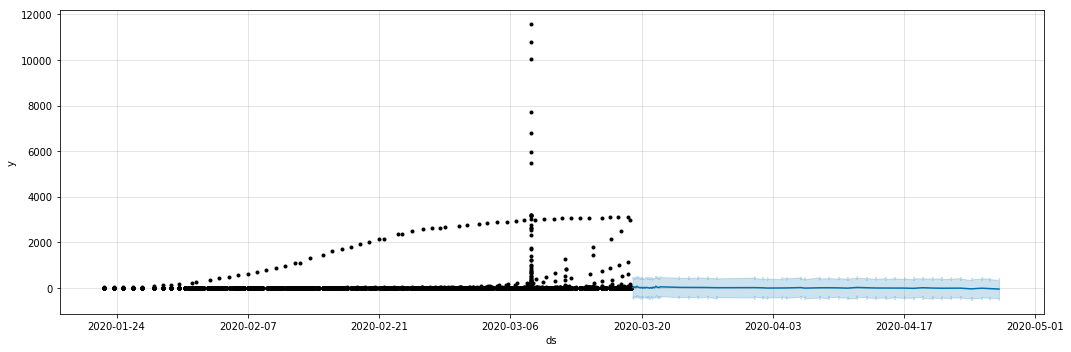

In [78]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(covid_test_fcst,
                 ax=ax)
plt.show()

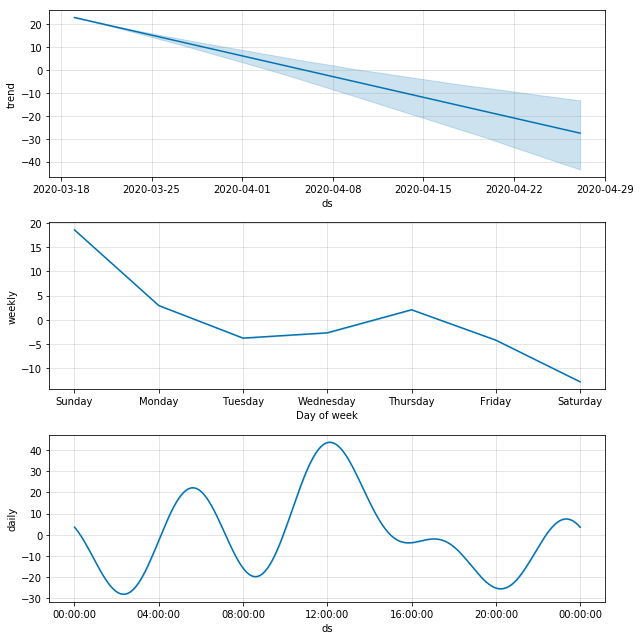

In [79]:
# Plot the components of the model
fig = model.plot_components(covid_test_fcst)

In [80]:
covid_data['last_update'].unique()

array(['2020-01-22T17:00:00.000000000', '2020-01-23T17:00:00.000000000',
       '2020-01-24T17:00:00.000000000', ...,
       '2020-04-25T06:31:19.000000000', '2020-04-26T02:31:18.000000000',
       '2020-04-27T02:31:20.000000000'], dtype='datetime64[ns]')

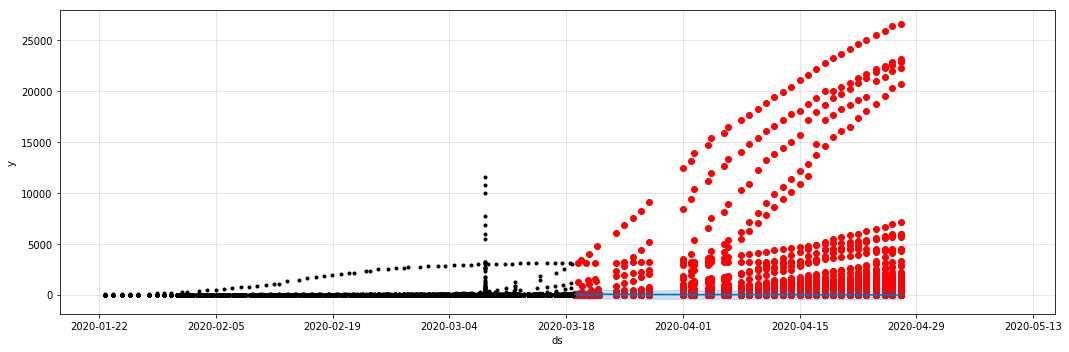

In [81]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(covid_test['last_update'], covid_test['deaths'], color='r')
fig = model.plot(covid_test_fcst, ax=ax)

# Error Metrics

In [82]:
mse=mean_squared_error(y_true=covid_test['deaths'],
                   y_pred=covid_test_fcst['yhat'])
mse

3659926.9955214723

In [83]:
mae=mean_absolute_error(y_true=covid_test['deaths'],
                   y_pred=covid_test_fcst['yhat'])
mae

331.64906122852136

In [84]:
#Root means squared error
from math import sqrt
rmse=sqrt(mse)
rmse

1913.0935668496386

## Confirmed cases forecast

In [85]:
confirmed_train = pd.DataFrame(latest.groupby('ObservationDate')['Confirmed'].sum().reset_index()).rename(columns={'ObservationDate': 'ds', 'Confirmed': 'y'})
confirmed_train

ds          y
0   01/22/2020      555.0
1   01/23/2020      653.0
2   01/24/2020      941.0
3   01/25/2020     1438.0
4   01/26/2020     2118.0
..         ...        ...
91  04/22/2020  2623960.0
92  04/23/2020  2708885.0
93  04/24/2020  2810715.0
94  04/25/2020  2896746.0
95  04/26/2020  2971475.0

[96 rows x 2 columns]

In [86]:
# Modelling 
prophet = Prophet()
prophet.fit(confirmed_train)
future = prophet.make_future_dataframe(periods=365)
confirmed_predict = prophet.predict(future)

In [87]:
fig = plot_plotly(prophet, confirmed_predict)  
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Predictions : Possible New Cases',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig

## Recovered cases forecast

In [88]:
recovered_train = pd.DataFrame(latest.groupby('ObservationDate')['Recovered'].sum().reset_index()).rename(columns={'ObservationDate': 'ds', 'Recovered': 'y'})
recovered_train

ds         y
0   01/22/2020      28.0
1   01/23/2020      30.0
2   01/24/2020      36.0
3   01/25/2020      39.0
4   01/26/2020      52.0
..         ...       ...
91  04/22/2020  709694.0
92  04/23/2020  738486.0
93  04/24/2020  793420.0
94  04/25/2020  816685.0
95  04/26/2020  865733.0

[96 rows x 2 columns]

In [89]:
prophet = Prophet()
prophet.fit(recovered_train)
future = prophet.make_future_dataframe(periods=365)
recoverd_predicted = prophet.predict(future)

In [90]:
fig = plot_plotly(prophet, recoverd_predicted)  
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Predictions : Recoveries forecasted over time',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig

# Cross Validation and Performance metrics of the model

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, initial='59 days',
                         period='365 days', horizon = '16 days')

In [ ]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

df_p = performance_metrics(df_cv)
df_p.head()

# Forecasting with  Long Short Term Memory Networks (LSTM) models
* Recurrent Neural Networks (RNNs) are very good at processing sequences of data.
* They can “recall” patterns in the data that are very far into the past (or future).
* The Long Short Term Memory Networks are an example of an RNN

In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch

In [ ]:
import torch
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
# Remove first 4 columns

confirmed =confirmed.iloc[:, 4:]

In [ ]:
# check for null values
confirmed.isnull().sum().sum()

In [ ]:
confirmed = confirmed.sum(axis=0)
confirmed.index = pd.to_datetime(confirmed.index)
confirmed.head()

In [ ]:
plt.plot(confirmed)
plt.title("Total Confirmed cases");

In [ ]:
daily_cases = confirmed.diff().fillna(confirmed[0]).astype(np.int64)
daily_cases.head()

In [ ]:
plt.plot(daily_cases)
plt.title("Daily cases")

In [ ]:
daily_cases.shape

# Preprocessing

In [ ]:
test_data_size = 35

train_data = confirmed[:-test_data_size]
test_data = confirmed[-test_data_size:]

train_data.shape

In [ ]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_data, axis=1))

train_data = scaler.transform(np.expand_dims(train_data, axis=1))

test_data = scaler.transform(np.expand_dims(test_data, axis=1))

In [ ]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

In [ ]:
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [ ]:
X_train.shape

In [ ]:
X_train[:2]

In [ ]:
y_train.shape

In [ ]:
y_train[:2]

In [ ]:
train_data[:10]

# Modeling

In [ ]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

 # Training 

In [ ]:
def train_model(
  model,
  train_data,
  train_labels,
  test_data=None,
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 60

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(X_train)

    loss = loss_fn(y_pred.float(), y_train)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

  return model.eval(), train_hist, test_hist

In [ ]:
model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=512,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model,
  X_train,
  y_train,
  X_test,
  y_test
)

In [ ]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();

# Predict daily cases

In [ ]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [ ]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [ ]:
plt.plot(
  daily_cases.index[:len(train_data)],
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)],
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)],
  predicted_cases,
  label='Predicted Daily Cases'
)

plt.legend();

# Train with all the data

In [ ]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(daily_cases, axis=1))

all_data = scaler.transform(np.expand_dims(daily_cases, axis=1))

all_data.shape

In [ ]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=512,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

# Predict future cases

In [ ]:
DAYS_TO_PREDICT = 90

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [ ]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [ ]:
daily_cases.index[-1]

In [ ]:
predicted_index = pd.date_range(
  start=daily_cases.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

In [ ]:
plt.plot(daily_cases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();